In [6]:
import numpy as np
from scipy.io import loadmat

feat_path = './final_feat_train.mat'
lab_path = './final_label_bin_train.lab'
feat_raw = loadmat(feat_path)
label = np.loadtxt(lab_path)


In [8]:
feat = {
    'data': feat_raw['final_feat_train'],
    'target': label,
}

X = feat['data']
y = feat['target']
display(X.shape)
display(y.shape)

(6119, 60)

(6119,)

In [10]:
import pandas as pd

feat_cols = ['feat '+str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feat_cols)
display(df.head())
df['label'] = y
display(df.head())


,feat 0,feat 1,feat 2,feat 3,feat 4,feat 5,feat 6,feat 7,feat 8,feat 9,...,feat 50,feat 51,feat 52,feat 53,feat 54,feat 55,feat 56,feat 57,feat 58,feat 59
0,33.547715,3.464168,0.890997,0.747812,0.310673,0.516365,-0.464731,-0.239808,-0.777670,0.601631,...,0.038008,0.005460,-0.013306,0.021221,0.024263,-0.021209,-0.026741,0.040747,0.040373,-0.013847
1,35.348733,3.509539,0.639064,1.148169,0.509341,0.779301,-0.585586,-0.230029,-0.775699,0.512844,...,0.032174,0.002788,-0.008315,0.026046,0.022168,-0.034745,-0.030840,0.051955,0.039839,-0.019215
2,36.565300,2.729567,0.616731,1.554127,0.798805,0.585988,-0.507933,0.136658,-0.452790,0.262388,...,0.017632,-0.000318,0.005678,0.030324,0.023669,-0.031985,-0.028239,0.056605,0.025781,-0.024103
3,37.573655,2.375342,0.766670,1.518156,0.851397,0.341646,-0.285033,0.132131,-0.466072,0.209920,...,-0.000082,-0.000393,0.022265,0.029322,0.021474,-0.029488,-0.025107,0.051566,0.000552,-0.022979
4,37.899307,2.075245,0.686830,1.311164,0.768675,0.295340,-0.256171,-0.034216,-0.625304,0.113658,...,-0.016429,-0.000623,0.031734,0.019359,0.014396,-0.022353,-0.017285,0.037478,-0.031997,-0.021051


,feat 0,feat 1,feat 2,feat 3,feat 4,feat 5,feat 6,feat 7,feat 8,feat 9,...,feat 51,feat 52,feat 53,feat 54,feat 55,feat 56,feat 57,feat 58,feat 59,label
0,33.547715,3.464168,0.890997,0.747812,0.310673,0.516365,-0.464731,-0.239808,-0.777670,0.601631,...,0.005460,-0.013306,0.021221,0.024263,-0.021209,-0.026741,0.040747,0.040373,-0.013847,0.0
1,35.348733,3.509539,0.639064,1.148169,0.509341,0.779301,-0.585586,-0.230029,-0.775699,0.512844,...,0.002788,-0.008315,0.026046,0.022168,-0.034745,-0.030840,0.051955,0.039839,-0.019215,0.0
2,36.565300,2.729567,0.616731,1.554127,0.798805,0.585988,-0.507933,0.136658,-0.452790,0.262388,...,-0.000318,0.005678,0.030324,0.023669,-0.031985,-0.028239,0.056605,0.025781,-0.024103,0.0
3,37.573655,2.375342,0.766670,1.518156,0.851397,0.341646,-0.285033,0.132131,-0.466072,0.209920,...,-0.000393,0.022265,0.029322,0.021474,-0.029488,-0.025107,0.051566,0.000552,-0.022979,0.0
4,37.899307,2.075245,0.686830,1.311164,0.768675,0.295340,-0.256171,-0.034216,-0.625304,0.113658,...,-0.000623,0.031734,0.019359,0.014396,-0.022353,-0.017285,0.037478,-0.031997,-0.021051,0.0


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca_one'] = pca_result[:, 0]
df['pca_two'] = pca_result[:, 1]
df['pca_three'] = pca_result[:, 2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_.cumsum()))

Explained variation per principal component: [0.93581146 0.01957932 0.01014318]
Explained variation per principal component: [0.93581146 0.95539079 0.96553397]


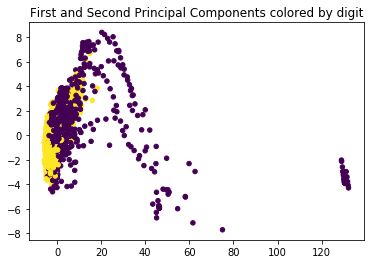

In [38]:
plt.scatter(df['pca_one'], df['pca_two'], c=df['label'], s=20)
plt.title('First and Second Principal Components colored by digit')
plt.show()

In [39]:
import time
from sklearn.manifold import TSNE

start = time.time()
tsne = TSNE(n_components=2, perplexity=60, n_iter=1000, verbose=3)
tsne_result = tsne.fit_transform(df[feat_cols].values)
print('t-SNE done! Time elapsed: ', time.time()-start)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 6119 samples in 0.041s...
[t-SNE] Computed neighbors for 6119 samples in 3.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6119
[t-SNE] Computed conditional probabilities for sample 2000 / 6119
[t-SNE] Computed conditional probabilities for sample 3000 / 6119
[t-SNE] Computed conditional probabilities for sample 4000 / 6119
[t-SNE] Computed conditional probabilities for sample 5000 / 6119
[t-SNE] Computed conditional probabilities for sample 6000 / 6119
[t-SNE] Computed conditional probabilities for sample 6119 / 6119
[t-SNE] Mean sigma: 0.764095
[t-SNE] Computed conditional probabilities in 0.716s
[t-SNE] Iteration 50: error = 80.8096924, gradient norm = 0.0300034 (50 iterations in 26.040s)
[t-SNE] Iteration 100: error = 73.4936142, gradient norm = 0.0026422 (50 iterations in 19.056s)
[t-SNE] Iteration 150: error = 72.8413696, gradient norm = 0.0004138 (50 iterations in 17.438s)
[t-SNE] Iteration 200: erro

In [40]:
df_tsne = df.copy()
display(df_tsne.shape)
display(tsne_result.shape)

(6119, 64)

(6119, 2)

,feat 0,feat 1,feat 2,feat 3,feat 4,feat 5,feat 6,feat 7,feat 8,feat 9,...,feat 56,feat 57,feat 58,feat 59,label,pca_one,pca_two,pca_three,x_tsne,y_tsne
0,33.547715,3.464168,0.890997,0.747812,0.310673,0.516365,-0.464731,-0.239808,-0.777670,0.601631,...,-0.026741,0.040747,0.040373,-0.013847,0.0,10.093363,1.931861,-0.729791,57.377930,-37.052456
1,35.348733,3.509539,0.639064,1.148169,0.509341,0.779301,-0.585586,-0.230029,-0.775699,0.512844,...,-0.030840,0.051955,0.039839,-0.019215,0.0,8.289216,1.993367,-0.676069,46.229561,-32.887085
2,36.565300,2.729567,0.616731,1.554127,0.798805,0.585988,-0.507933,0.136658,-0.452790,0.262388,...,-0.028239,0.056605,0.025781,-0.024103,0.0,7.059611,1.224088,-0.656140,45.912769,-32.356388
3,37.573655,2.375342,0.766670,1.518156,0.851397,0.341646,-0.285033,0.132131,-0.466072,0.209920,...,-0.025107,0.051566,0.000552,-0.022979,0.0,6.054718,0.877205,-0.715230,45.736267,-31.943577
4,37.899307,2.075245,0.686830,1.311164,0.768675,0.295340,-0.256171,-0.034216,-0.625304,0.113658,...,-0.017285,0.037478,-0.031997,-0.021051,0.0,5.734880,0.603750,-0.517150,45.761452,-31.726107


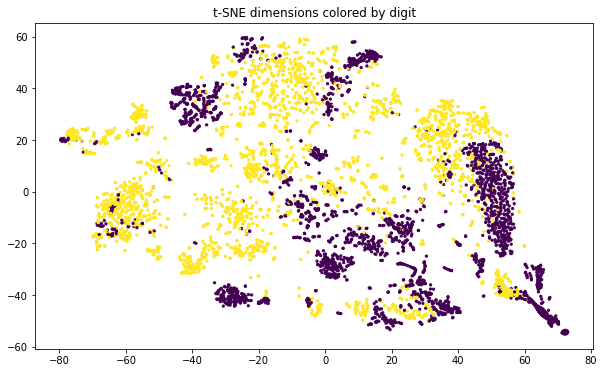

In [41]:
df_tsne['x_tsne'] = tsne_result[:, 0]
df_tsne['y_tsne'] = tsne_result[:, 1]
display(df_tsne.head())

plt.figure(figsize=(10,6))
plt.scatter(df_tsne['x_tsne'], df_tsne['y_tsne'], c=df_tsne['label'], s=5)
plt.title('t-SNE dimensions colored by digit')
plt.show()